In [369]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
base_path = Path('/content/drive/MyDrive/DANE LEKCJA 1') # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

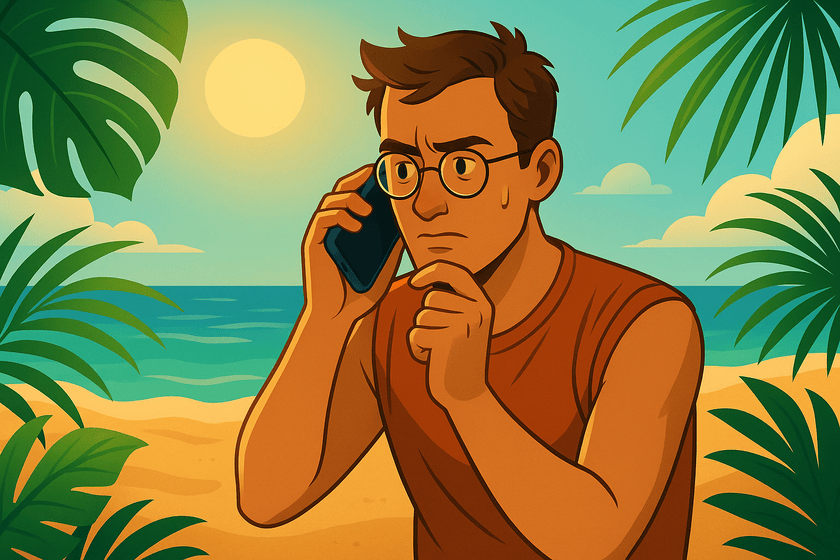

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


# Setup

Wczytanie danych

In [371]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

Sprawdzenie wyglądu tabeli i typów

In [372]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [373]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      793 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [374]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,793.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,33.123938
std,0.486592,0.836071,14.526497,1.102743,0.806057,51.578312
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Braki i znaczenie kolumn


In [375]:
titanic_df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,98
Cabin,687


**Widzimy, że brakuje danych w kolumnach dotyczących:**

*   Wieku - 177 braków
*   Ceny biletu - 98 braków - można uzupełnić patrząc na ceny biletów tej samej klasy
*   Kabiny w jakiej był pasażer - 687 braków - tutaj nie ma sensu moim zdaniem tego
*   Port w jakim wsiadł na pokład statku - 2 braki - uzupełnimy poprzez wstawienie najpopularniejszych portów



**Znaczenie kolumn:**

*   Pclass - klasa jaką podróżował pasażer, warto chyba zostawić tym bardziej, że nie ma braków
*   Name - dane pasażera, do naszej analizy niepotrzebne więc usuniemy ale można by było wyciągnać tytuł osoby do bardziej rozbudowanej analizy
*   Sex - płeć pasażera, zostawiamy
*   SibSp, Parch - krewni, zostawiamy
*   Ticket - numer biletu, można usunąć, ponieważ nic nie wnosi
*   Fare - cena biletu, może się przyda
*   Cabin - kabina pasażera, jakby uwzględnić rozłożenie kabin w statku może by było potrzebne ale są brakujące dane a nasza analiza nie jest taka rozbudowana więc naura
*   Embarked - port w jakim wsiadł, zostawiamy

**Usuwamy kolumny uznane za niepotrzebne**

In [376]:
titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Uzupełnianie danych

Brakuje nam informacji o wieku, ceny biletu i portu niektórych pasażerów, które teraz uzupełnimy ale najpierw sprawdźmy rozkłady danych, żeby dobrać odpowiedni sposób uzupełnienia



In [377]:
def plot_numeric_histogram(df, column):
  data = titanic_df[column].dropna()
  mean = data.mean()
  median = data.median()

  plt.figure(figsize=(6, 4))
  plt.hist(data, bins=30, color='steelblue', edgecolor='black')
  plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
  plt.axvline(median, color='green', linestyle='-', linewidth=2, label=f'Median: {median:.2f}')

  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.legend()
  plt.tight_layout()
  plt.show()

Sprawdźmy jak wygląda rozkład wieku

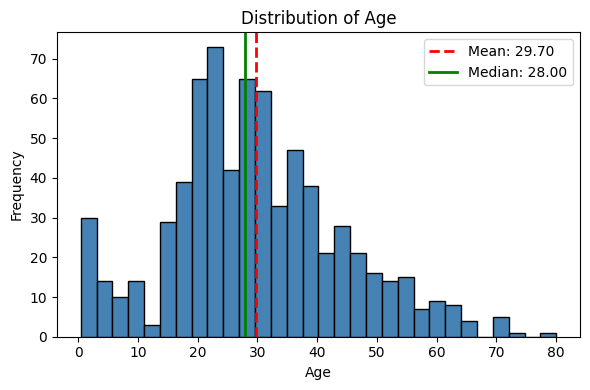

In [378]:
plot_numeric_histogram(titanic_df, 'Age')

Na wykresie widzimy, że najwięcej osób jest w wieku 20-30 lat, jednak jak uzupełnimy samą medianą czy średnią to wyrzuci to w powietrze, ponieważ brakuje nam aż 177 danych, więc dobrze by było zrobić to w oparciu o jakieś dodatkowe kryteria jak klasa podróży czy płeć.

In [379]:
titanic_df['Age'] = titanic_df.groupby(["Pclass", 'Sex'])['Age'] \
            .transform(lambda x: x.fillna(x.median()))

Sprawdźmy jak teraz będzie wyglądał nasz wykres

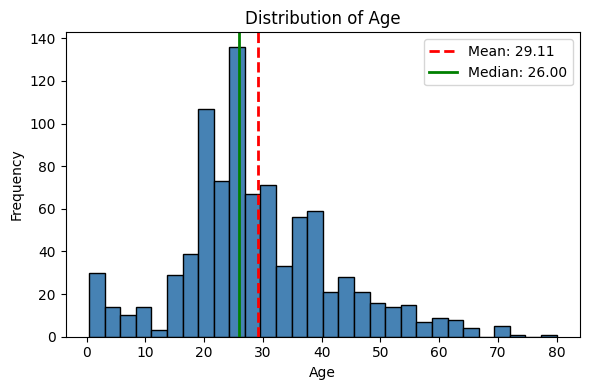

In [380]:
plot_numeric_histogram(titanic_df, 'Age')

Widzimy znaczy skok dla +- 26 lat jednak inne wartości także poszły w góre więc można założyć, że jest okej

Zajmijmy się teraz ceną biletu

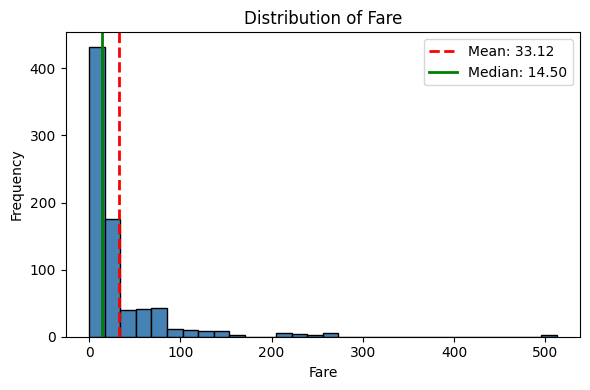

In [381]:
plot_numeric_histogram(titanic_df, 'Fare')

Widzimy, że dominują niższe ceny biletów jednak przy uzupełnianiu wypadało by uwzględnić także klasę jaką podróżował pasażer, bo może dojść do sytuacji gdzie ktoś w najwyższej klasie będzie miał podobną cenę biletu jak Ci w najniższej

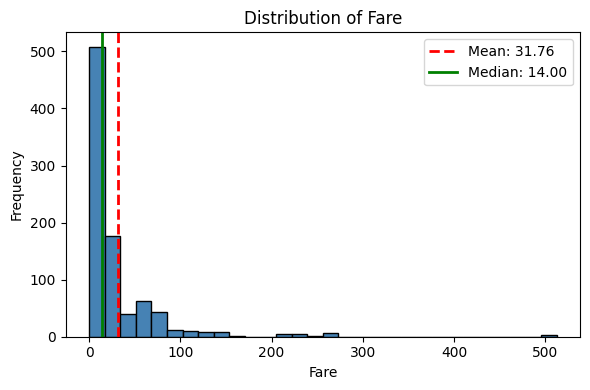

In [382]:
titanic_df['Fare'] = titanic_df.groupby("Pclass")['Fare'] \
            .transform(lambda x: x.fillna(x.median()))
plot_numeric_histogram(titanic_df, 'Fare')

Wydaje mi się że jest okej, więc zajmę się teraz brakami dotyczącymi portów jednak tam brakuje tylko dwóch więc uzupełnie tą wartością która występuję najwięcej razy i dla pewności teraz sprawdzę także czy napewno wszystko jest uzupełnione

In [383]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])
titanic_df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


Wygląda na to, że wszystkie dane zostały uzupełnione

# Nowe kolumny

Do symulacji możemy dodać dodatkowe kolumny które wypełnimy na podstawie danych jakie już posiadamy. Pierwszą z takich kolumn będzie **ageGroup** czyli grupa wiekowa (podział wzięty z https://zpe.gov.pl/a/struktura-plci-i-wieku-ludnosci-polski/DigZtLqyn).

In [384]:
ages = np.array(['Children', 'Youth and Adults', 'Elderly people'])
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 14, 64, np.inf], labels=ages)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Youth and Adults
2,1,1,female,38.0,1,0,71.2833,C,Youth and Adults
3,1,3,female,26.0,0,0,7.9250,S,Youth and Adults
4,1,1,female,35.0,1,0,53.1000,S,Youth and Adults
5,0,3,male,35.0,0,0,8.0500,S,Youth and Adults


Dodamy także kolumnę określającą wielkość rodziny **FamilySize**, która określi wielkość rodziny pasażera

In [385]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FamilySize
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Youth and Adults,2
2,1,1,female,38.0,1,0,71.2833,C,Youth and Adults,2
3,1,3,female,26.0,0,0,7.9250,S,Youth and Adults,1
4,1,1,female,35.0,1,0,53.1000,S,Youth and Adults,2
5,0,3,male,35.0,0,0,8.0500,S,Youth and Adults,1


Dodaliśmy kolumnę określającą wielkość rodziny pasażera, jeśli wynosi 1 to płynął sam.

Posiadając ilość osób na jednym bilecie możemy też obliczyć cenę biletu dla jednej osoby i później zbadać czy droższy bilet dawał większą szansę na przetrwanie


In [386]:
titanic_df['FarePerPerson'] = titanic_df['Fare'] / titanic_df['FamilySize']
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FamilySize,FarePerPerson
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Youth and Adults,2,3.62500
2,1,1,female,38.0,1,0,71.2833,C,Youth and Adults,2,35.64165
3,1,3,female,26.0,0,0,7.9250,S,Youth and Adults,1,7.92500
4,1,1,female,35.0,1,0,53.1000,S,Youth and Adults,2,26.55000
5,0,3,male,35.0,0,0,8.0500,S,Youth and Adults,1,8.05000


# Rozkład danych kategorialnych

In [387]:
def categorial_plot(df, column):
  counts = df[column].value_counts()

  plt.figure(figsize=(6, 4))
  counts.plot(kind='bar', color='steelblue', edgecolor='black')
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.xticks(rotation=0)
  plt.show()

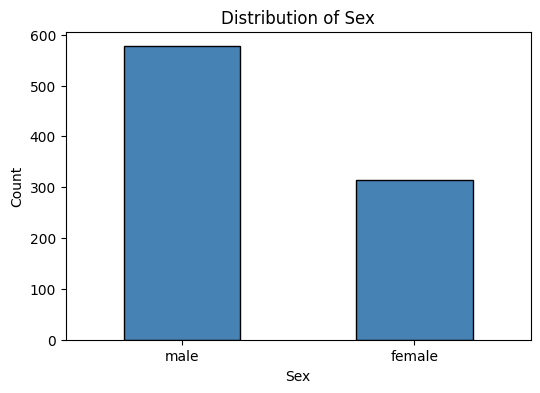

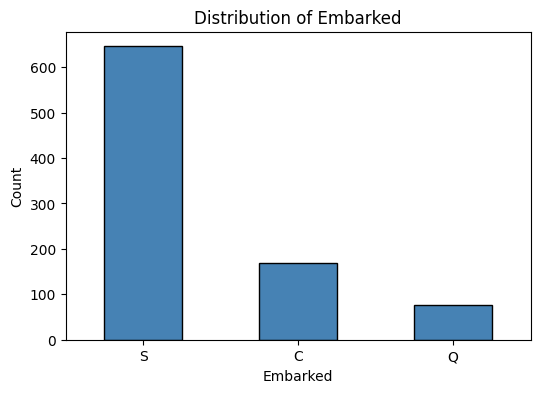

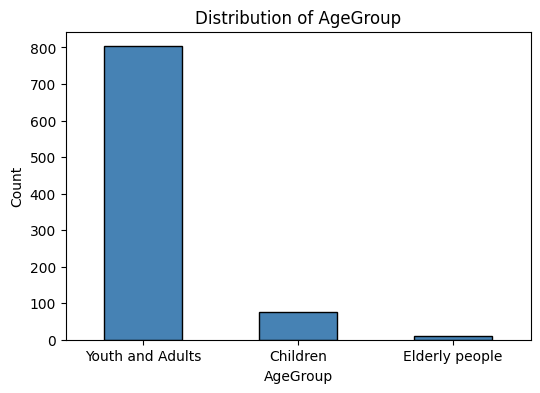

In [388]:
columns = ['Sex', 'Embarked', 'AgeGroup']

for column in columns:
  categorial_plot(titanic_df, column)

# Outliery

Sprawdzimy teraz czy w naszych danych występują outliery

In [389]:
def boxplot(df, column):
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=column, data=df)
  plt.title(f'Boxplot of {column}')
  plt.xlabel(column)

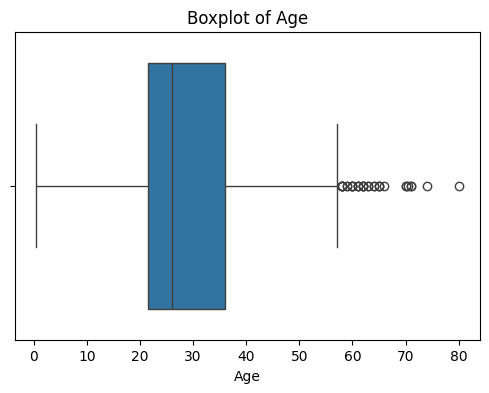

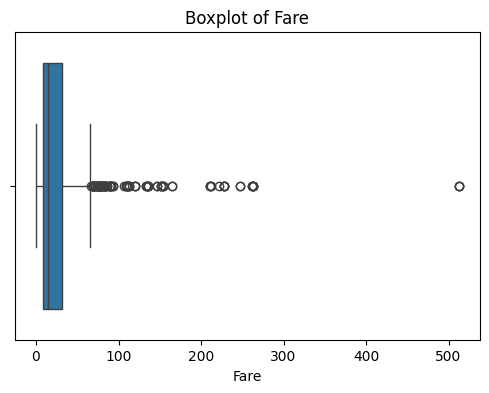

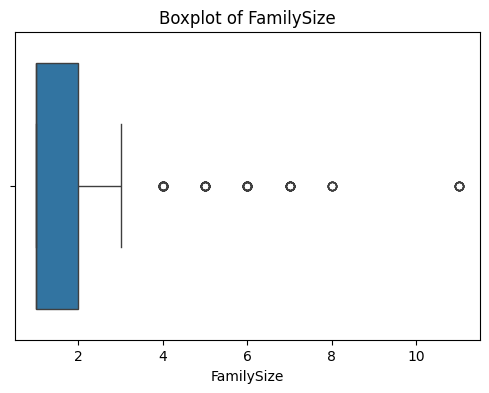

In [390]:
columns = ['Age', 'Fare', 'FamilySize']

for column in columns:
  boxplot(titanic_df, column)

Dla wieku i ceny biletu wystęją outliery ale wszystko jest okej, ponieważ człowiek może dożyc 80 lat, a najwięcej osób podróżowało najtańszą klasą stąd najwięcej niskich cen biletów. Dla family size zdarzają się pojedyncze wartości powyżej 4 jednak zdarzają się tak duże rodziny więc chyba można zostawić. Dla pozostałych kolumn moim zdaniem nie ma sensu sprawdzać outlierów.

# Przeżywalność wobec różnych czynników (kolumn)

In [391]:
def survival_rate_plot(column):
  plt.figure(figsize=(6,4))
  sns.barplot(data=titanic_df, x=column, y='Survived', errorbar=None)
  plt.title(f'Survival Rate by {column}')
  plt.ylabel('Survival Rate')
  plt.show()

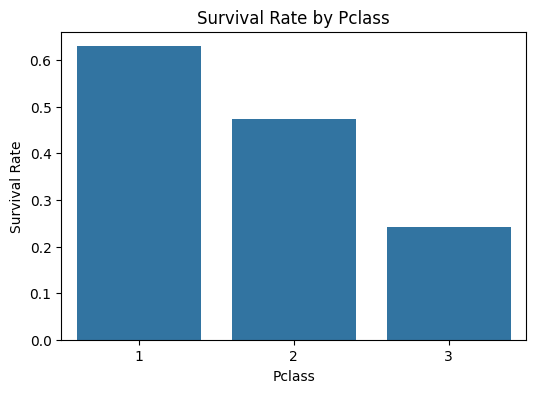

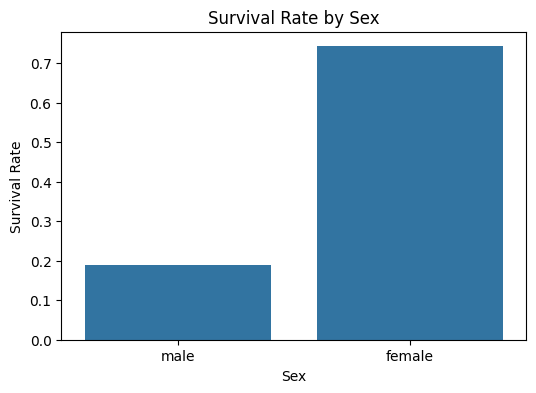

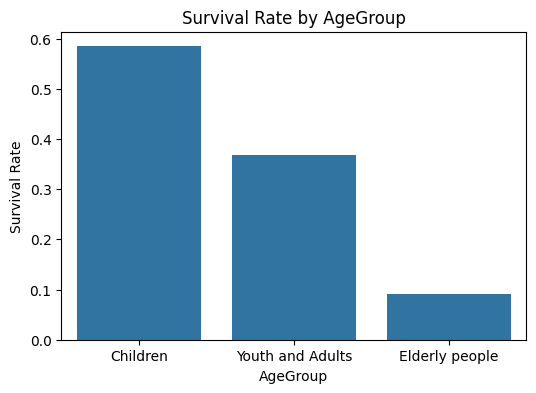

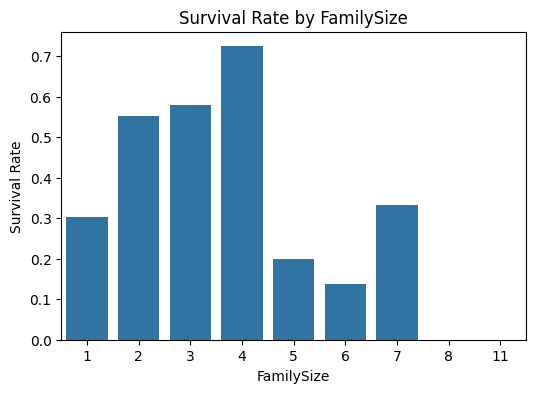

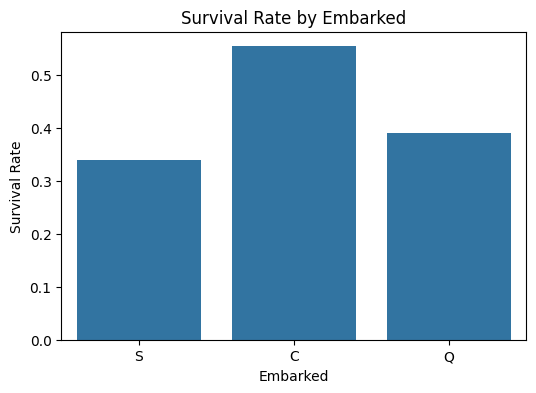

In [392]:
columns = ['Pclass', 'Sex', 'AgeGroup', 'FamilySize', 'Embarked']
for column in columns:
  survival_rate_plot(column)

Wykresy prezentują, że

*  **Klasa** - największe szanse na przeżycie miało się podróżując klasą 1 z 60% szans na przetrwanie
*   **Płeć** - kobiety poradziły sobie lepiej i miały przeżywalność na poziomie 70%
*   **Grupa Wiekowa** - dzieci cieszyły się największą szansą na przeżycie, wówczas gdy osoby starsze miały tylko 10%
*   **Rozmiar Rodziny** - przebywanie w 4 osoby dawało największą szansę jednak z dużych rodzin (8 i więcej) nie przetrwała ani jedna osoba
*   **Port** - wejście na pokład w Cherboughu dawało ponad 50% szans



# Heatmapa

Na potrzeby Heatmapy zakodujemy wartości kategorialne.

In [393]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['AgeGroup'] = titanic_df['AgeGroup'].map({'Children': 0, 'Youth and Adults': 1, 'Elderly people': 2})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [394]:
def correlation_plot(df):
  corr = df.corr(numeric_only=True)
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr, annot=True, cmap='coolwarm')
  plt.title('Correlation Heatmap')
  plt.tight_layout()
  plt.show()

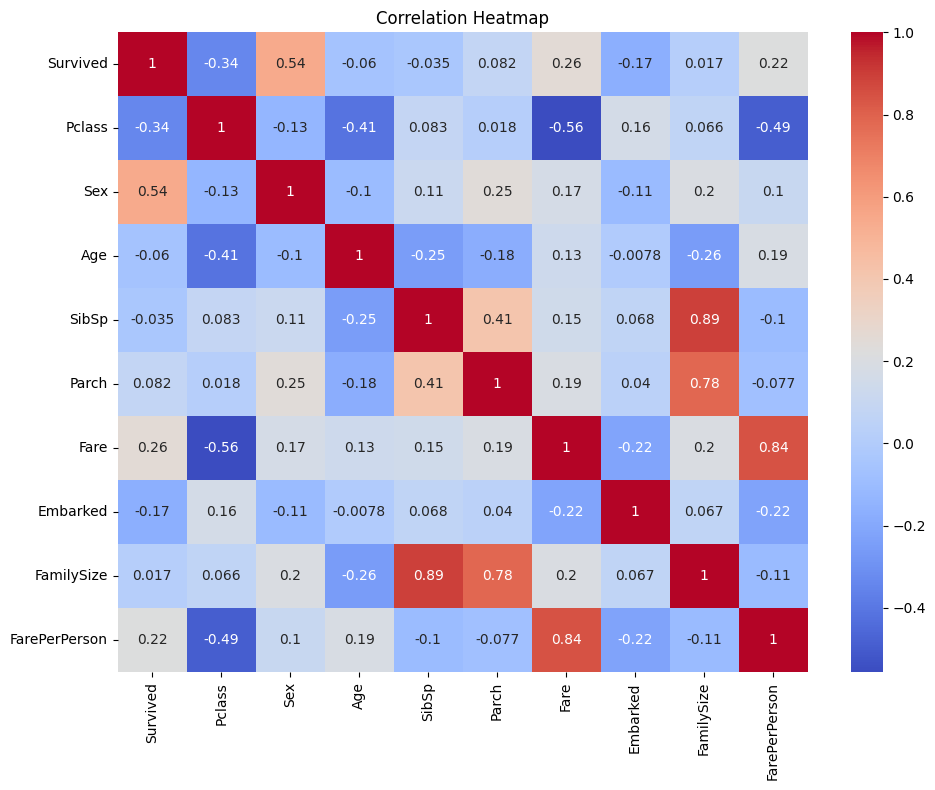

In [395]:
correlation_plot(titanic_df)

In [396]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked', 'Sex', 'Pclass'])

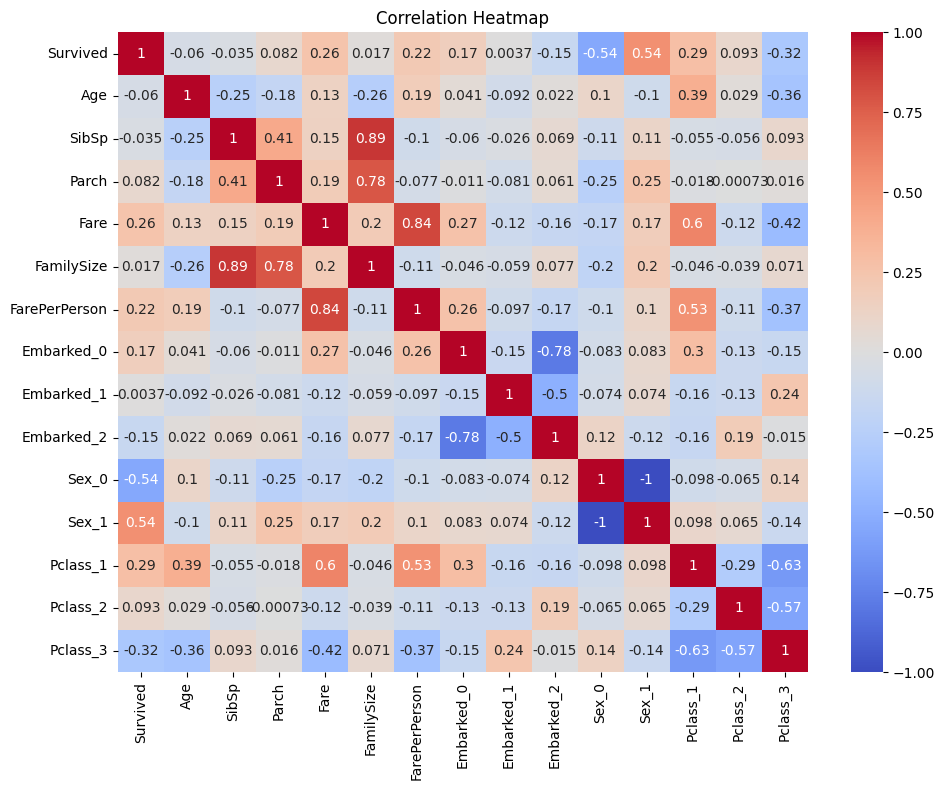

In [397]:
correlation_plot(titanic_df)

Teraz nasza heatmapa jest o wiele dokładniejsza i pozwala odczytać więcej.

**Korelacje pozytywne**

*   Sex_1 - kobiety miały większą szansę na przetrwanie
*   Ze wszystkich klas biletów to klasa 1 miała największe szanse

**Korelacje negatywne**

*   Sex_0 - mężczyźni mieli małą szansę na przetrwanie
*   Klasa 3 miała najmniejsze szansę ze wszystkich


